In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

In [ ]:
#увеличим дефолтный размер графиков

rcParams['figure.figsize'] = 11,7

In [ ]:
# данные приложений из Google Play 

df = pd.read_csv('/content/googleplaystore.csv', encoding='utf-8')

# возьмем атрибуты, которые понадобятся для анализа данных
df_app = df[['App', 'Category', 'Rating', 'Reviews', 'Price', 'Content Rating', 'Genres']]
df_app

,App,Category,Rating,Reviews,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,NaN,3,0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0,Mature 17+,Books & Reference


In [ ]:
# Посмотрим информацию о данных
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Price           10841 non-null  object 
 5   Content Rating  10840 non-null  object 
 6   Genres          10841 non-null  object 
dtypes: float64(1), object(6)
memory usage: 593.0+ KB


In [ ]:
"""
Исходя из полученной информации о данных можно заметить что некоторые атрибуты с 
числовыми данными имеют тип данных строку, а не число, поэтому понадобится 
дополнительно преобразовать их.

При преобразовании атрибута Reviews возникла ошибка, что нет возможности
преобразовать строку в число. Проверив данные, обнаружила, что строка с индексом 
10472 содержит в себе ошибочно заполненные данные, есть некоторый сдвиг по всем
значениям. Например Reviews соедржит значение атрибута Size и т.д. Поэтому можно 
удалить одну строку:
"""

df_app = df_app.drop(10472)

In [ ]:
"""
В датафрейме присутствуют дубликаты по названию приложений и других его атрибутов.
Для того чтобы убрать лишнее, уберем строки, отсортировав по убыванию отзывы и 
оценки, оставив с максимальным значением:
"""

df_app_new = df_app.sort_values(by=['Rating', 'Reviews'], ascending=False)
df_app_new = df_app_new.drop_duplicates(subset=['App'], keep='first')
df_app_new

,App,Category,Rating,Reviews,Price,Content Rating,Genres
9496,Master E.K,FAMILY,5.0,90,0,Everyone,Education
5245,AJ RETAILS,SHOPPING,5.0,9,0,Everyone,Shopping
9008,DW Timer,TOOLS,5.0,9,0,Everyone,Tools
9188,EB Scanner,PRODUCTIVITY,5.0,9,0,Everyone,Productivity
5795,Axe Champs! Wars,GAME,5.0,8,0,Everyone,Arcade
...,...,...,...,...,...,...,...
10773,FQ India,LIFESTYLE,NaN,0,0,Everyone,Lifestyle
10774,Miss FQ,NEWS_AND_MAGAZINES,NaN,0,0,Everyone,News & Magazines
10798,Word Search Tab 1 FR,FAMILY,NaN,0,$1.04,Everyone,Puzzle
10822,PLMGSS FR,PRODUCTIVITY,NaN,0,0,Everyone,Productivity


In [ ]:
df_app_new['Reviews'] = df_app_new['Reviews'].astype('int')

# дополнительно уберём знак $ из атрибута Price
df_app_new['Price'] = df_app_new['Price'].replace({'\$':''}, regex = True).astype('float64')
df_app_new

,App,Category,Rating,Reviews,Price,Content Rating,Genres
9496,Master E.K,FAMILY,5.0,90,0.00,Everyone,Education
5245,AJ RETAILS,SHOPPING,5.0,9,0.00,Everyone,Shopping
9008,DW Timer,TOOLS,5.0,9,0.00,Everyone,Tools
9188,EB Scanner,PRODUCTIVITY,5.0,9,0.00,Everyone,Productivity
5795,Axe Champs! Wars,GAME,5.0,8,0.00,Everyone,Arcade
...,...,...,...,...,...,...,...
10773,FQ India,LIFESTYLE,NaN,0,0.00,Everyone,Lifestyle
10774,Miss FQ,NEWS_AND_MAGAZINES,NaN,0,0.00,Everyone,News & Magazines
10798,Word Search Tab 1 FR,FAMILY,NaN,0,1.04,Everyone,Puzzle
10822,PLMGSS FR,PRODUCTIVITY,NaN,0,0.00,Everyone,Productivity


In [ ]:
# проверим значения атрибутов на уникальность
print('Category: ', df_app_new['Category'].unique())
print('--------------------------')
print('Content Rating: ', df_app_new['Content Rating'].unique())
print('--------------------------')

list_genres = []
for genr in df_app_new['Genres'].unique():
    list_genres.append(genr.split(';'))
set(sum(list_genres , []))


Category:  ['FAMILY' 'SHOPPING' 'TOOLS' 'PRODUCTIVITY' 'GAME' 'BUSINESS' 'LIFESTYLE'
 'COMMUNICATION' 'SOCIAL' 'EVENTS' 'SPORTS' 'DATING' 'MEDICAL'
 'TRAVEL_AND_LOCAL' 'HEALTH_AND_FITNESS' 'BOOKS_AND_REFERENCE'
 'PERSONALIZATION' 'PHOTOGRAPHY' 'NEWS_AND_MAGAZINES' 'FINANCE' 'COMICS'
 'LIBRARIES_AND_DEMO' 'FOOD_AND_DRINK' 'PARENTING' 'ART_AND_DESIGN'
 'AUTO_AND_VEHICLES' 'BEAUTY' 'MAPS_AND_NAVIGATION' 'VIDEO_PLAYERS'
 'EDUCATION' 'WEATHER' 'HOUSE_AND_HOME' 'ENTERTAINMENT']
--------------------------
Content Rating:  ['Everyone' 'Teen' 'Mature 17+' 'Everyone 10+' 'Adults only 18+' 'Unrated']
--------------------------


{'Action',
 'Action & Adventure',
 'Adventure',
 'Arcade',
 'Art & Design',
 'Auto & Vehicles',
 'Beauty',
 'Board',
 'Books & Reference',
 'Brain Games',
 'Business',
 'Card',
 'Casino',
 'Casual',
 'Comics',
 'Communication',
 'Creativity',
 'Dating',
 'Education',
 'Educational',
 'Entertainment',
 'Events',
 'Finance',
 'Food & Drink',
 'Health & Fitness',
 'House & Home',
 'Libraries & Demo',
 'Lifestyle',
 'Maps & Navigation',
 'Medical',
 'Music',
 'Music & Audio',
 'Music & Video',
 'News & Magazines',
 'Parenting',
 'Personalization',
 'Photography',
 'Pretend Play',
 'Productivity',
 'Puzzle',
 'Racing',
 'Role Playing',
 'Shopping',
 'Simulation',
 'Social',
 'Sports',
 'Strategy',
 'Tools',
 'Travel & Local',
 'Trivia',
 'Video Players & Editors',
 'Weather',
 'Word'}

In [ ]:
"""
отсутствие рейтинга нормальное явление, так как пользователи могли не ставить 
оценки
"""

df_app_new['Rating'].unique()

array([5. , 4.9, 4.8, 4.7, 4.6, 4.5, 4.4, 4.3, 4.2, 4.1, 4. , 3.9, 3.8,
       3.7, 3.6, 3.5, 3.4, 3.3, 3.2, 3.1, 3. , 2.9, 2.8, 2.7, 2.6, 2.5,
       2.4, 2.3, 2.2, 2.1, 2. , 1.9, 1.8, 1.7, 1.6, 1.5, 1.4, 1.2, 1. ,
       nan])

In [ ]:
df_app_new.info()

"""
Теперь данные в нужно виде для дальнейшего анализа
"""

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 9496 to 10835
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Price           9659 non-null   float64
 5   Content Rating  9659 non-null   object 
 6   Genres          9659 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 603.7+ KB


'\nТеперь данные в нужно виде для дальнейшего анализа\n'

In [ ]:
"""
Посмотрим на 10 категорий, у которых наибольшее количество игр
"""
top = df_app_new['Category'].value_counts(ascending=False).head(10).index.values
top

array(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL',
       'PERSONALIZATION', 'PRODUCTIVITY', 'LIFESTYLE', 'FINANCE',
       'SPORTS'], dtype=object)

In [ ]:
# создание сводной таблицы для дальнейшей визуализации с помощью heatmap
df_price = df_app_new[df_app_new['Category'].isin(top)].pivot_table(index='Category', columns='Content Rating', values='Price', aggfunc=sum).fillna(0)
df_price

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Category,,,,,,
BUSINESS,0.0,175.29,0.00,0.00,0.00,0.0
FAMILY,0.0,2159.00,86.80,44.96,113.09,0.0
FINANCE,0.0,2500.84,0.00,0.00,399.99,0.0
GAME,0.0,125.68,32.91,13.96,111.76,0.0
LIFESTYLE,0.0,2352.90,0.00,6.98,0.99,0.0
MEDICAL,0.0,955.73,19.99,11.99,7.99,0.0
PERSONALIZATION,0.0,150.48,0.00,0.00,0.00,0.0
PRODUCTIVITY,0.0,246.64,0.00,4.29,0.00,0.0
SPORTS,0.0,100.00,0.00,0.00,0.00,0.0


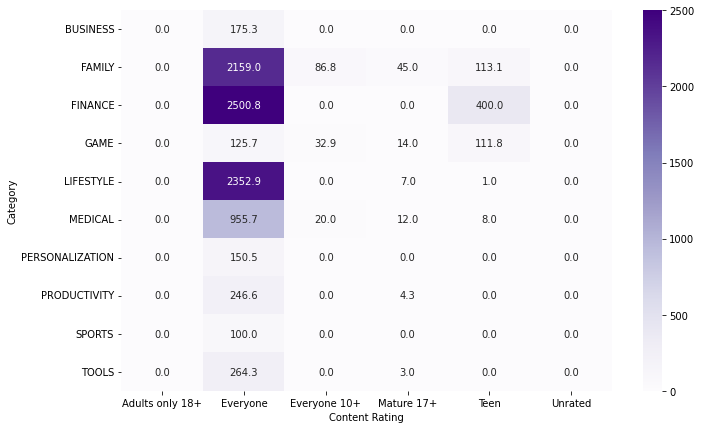

In [ ]:
"""
По текущей визуализации можно сказать о том, что больше покупают приложения по 
категориям finance, family, lifestyle где контент для evryone:
"""

sns.heatmap(df_price, cmap='Purples', annot=True, fmt=".1f")

In [ ]:
df_reviews = df_app_new[df_app_new['Category'].isin(top)].pivot_table(index='Category', columns='Content Rating', values='Reviews', aggfunc=sum).fillna(0)
df_reviews

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Category,,,,,,
BUSINESS,0.0,9886981.0,30.0,0.0,4012.0,0.0
FAMILY,0.0,97566981.0,50275565.0,1656655.0,43866404.0,1.0
FINANCE,0.0,12619622.0,0.0,0.0,43351.0,0.0
GAME,0.0,306260684.0,145010478.0,29539611.0,109806994.0,0.0
LIFESTYLE,0.0,7594600.0,162528.0,3947965.0,127599.0,0.0
MEDICAL,0.0,1278748.0,1420.0,1591.0,825.0,0.0
PERSONALIZATION,0.0,36301397.0,920999.0,16197.0,16304524.0,0.0
PRODUCTIVITY,0.0,55163524.0,49.0,84.0,427199.0,0.0
SPORTS,50017.0,29780097.0,794777.0,329345.0,4394922.0,0.0


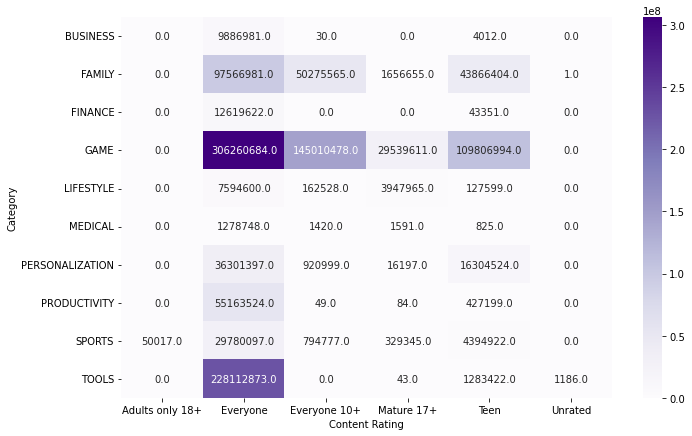

In [ ]:
"""
По текущей визуализации можно сказать о том, что больше отзывов о приложениях по 
категориям game и tools, чуть меньше family где контент для evryone, а также 
в меньшей степени отзывы оставляют по приложениям game где контент evryone 10+ и
teen:
"""

sns.heatmap(df_reviews, cmap='Purples', annot=True, fmt=".1f")

In [ ]:
df_rating = df_app_new[df_app_new['Category'].isin(top)].pivot_table(index='Category', columns='Content Rating', values='Rating', aggfunc=sum).fillna(0)
df_rating.reset_index()

Content Rating,Category,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,BUSINESS,0.0,1060.7,0.0,0.0,17.2,0.0
1,FAMILY,0.0,5256.6,477.0,184.5,975.8,0.0
2,FINANCE,0.0,1226.6,0.0,0.0,16.3,0.0
3,GAME,0.0,1901.4,434.6,275.0,1205.4,0.0
4,LIFESTYLE,0.0,1099.2,19.2,38.3,75.4,0.0
5,MEDICAL,0.0,1151.6,30.6,17.7,13.6,0.0
6,PERSONALIZATION,0.0,1132.8,21.9,36.0,100.3,0.0
7,PRODUCTIVITY,0.0,1242.9,3.6,4.6,8.1,0.0
8,SPORTS,4.5,998.2,26.2,13.2,54.1,0.0
9,TOOLS,0.0,2874.4,0.0,3.7,22.5,4.1


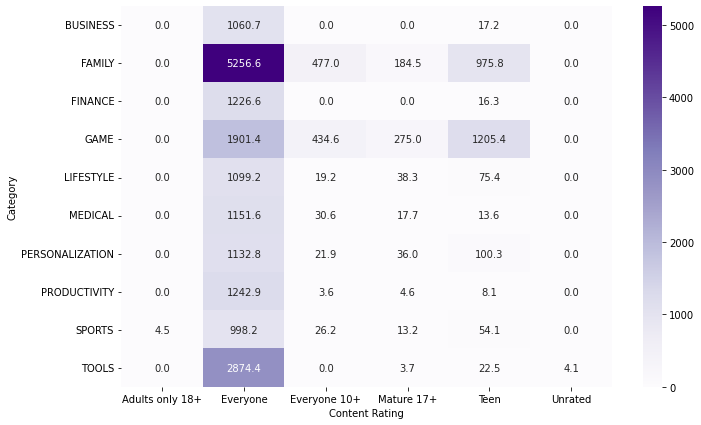

In [ ]:
"""
По текущей визуализации можно сказать о том, что больше ставят оценки по 
приложениям в категориях family где контент для evryone, чуть меньше game и tools:
"""

sns.heatmap(df_rating, cmap='Purples', annot=True, fmt=".1f")

In [76]:
data = []

for categ in df_app_new.Category.unique():
    data.append(
        go.Box(y=df_app_new[df_app_new.Category==categ].Rating, 
               name=categ)
    )
print(iplot(data, show_link = False))

None


In [ ]:
"""
По выбросам выше.
Выбросы связаны с низкими оценками от пользователей. Они входят по шкале от 1 до 
5, не больше и не меньше. Возможно это связано с низким качество контента, может 
быть это связано с работой самого приложения с технической стороны, ожидаемое у 
покупателя не совпало с реальным при покупке.
"""

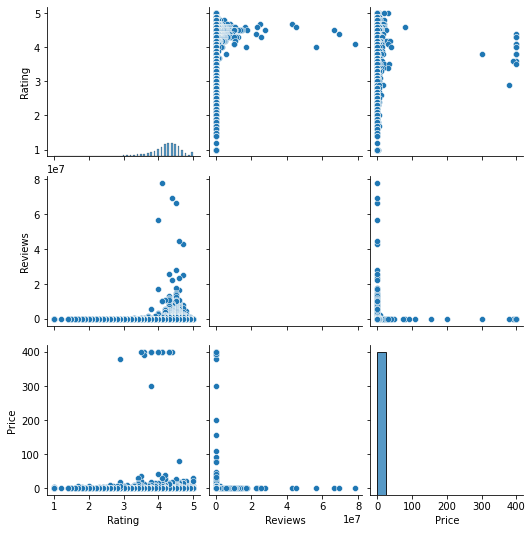

In [ ]:
sns.pairplot(df_app_new[['Rating', 'Reviews', 'Price']])

In [ ]:
"""
По визуализации выше.

Можно сказать что есть некоторая взаимосвязь. По большей части приложения
бесплатные, по ним же больше отзывов и оценок, так как более доступны для 
скачивания и нет привязки к оплате.
"""

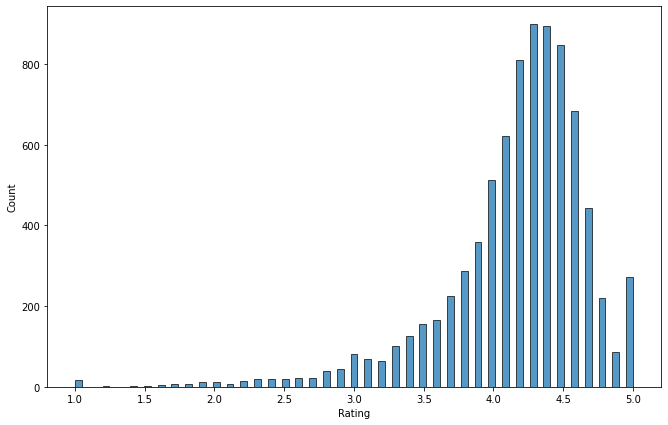

In [ ]:
"""
Визуализация говорит о том, что нет нормального распределения так как большее 
количество оценок ставят в районе 3,7 до 4,7 примерно, но также при это 
присутсвуют низкие оценки, но в меньшей степени.
"""

sns.histplot(df_app_new['Rating'])